# NMR Signal Processing Example

This notebook shows the basic signal processing steps to generate the NMR Spectroscopy. Spectroscopy allows one to determine the makeup of atoms in a protein or molecule my measuring the free induction decay (FID).

The following code is adapted from the NMRGlue library examples from http://nmrglue.readthedocs.io. You can get the data for this script from the Madison Metabolomics Consortium Database as __[expnmr_00001_1.tar](http://mmcd.nmrfam.wisc.edu/rawnmr/expnmr_00001_1.tar)__.

First we import the relevant libraries we will be using. This includes an NMR library, array library (Numpy) and plotting (Matplotlib).

In [22]:
import nmrglue as ng
import matplotlib.pyplot as plt
import numpy as np

Now load the NMR data acquired from an Bruker scanner

In [23]:
#what directory is the data in?
data_dir = 'data'

# read in the bruker formatted data
dic, data = ng.bruker.read(data_dir+'/expnmr_00001_1')

Do the actual signal processing. We will cover some of these in the course, so eventually we will understand what's going on!

In [24]:
# remove the digital filter
dataProcessed = ng.bruker.remove_digital_filter(dic, data)

# process the spectrum
dataProcessed = ng.proc_base.zf_size(dataProcessed, 32768)    # zero fill to 32768 points
dataProcessed = ng.proc_base.fft(dataProcessed)               # Fourier transform
dataProcessed = ng.proc_base.ps(dataProcessed, p0=-50.0)      # phase correction
dataProcessed = ng.proc_base.di(dataProcessed)                # discard the imaginaries
dataProcessed = ng.proc_base.rev(dataProcessed)               # reverse the data

Plot the result!

In [25]:
#plot the original FID signal
fig = plt.figure()
plt.plot(np.abs(data))

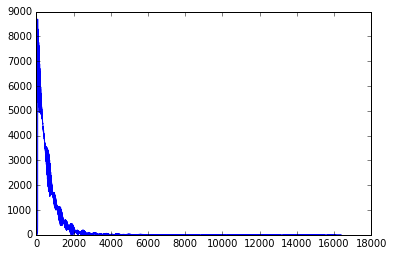

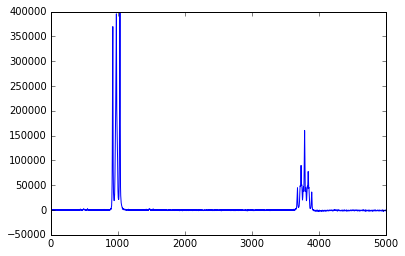

In [26]:
#plot the spectrum
fig = plt.figure()
plt.plot(dataProcessed[20000:25000])
plt.show()

The spectrum is unique for different proteins and molecules and we can use it to identify them in samples!